PCA:
1. it is used to reduce the dimension of data
2. it is a feature extraction technique
3. it is performed on the covariance matrix of data.
4. It find the principal component of the data
    * principal component are the axis or direction that captures the maximum varianc of the data
    * The first principal component is the direction which has maximum variance and minimum data loss(closeness).
    * each principal component is orthogonal to other principal component (bcoz of specteral Theroem: which say if matrix is symmeteric and semi definite then it's eigenvector are orthogonal
    * eigenvalue is the variance in the direction of eigenvector( bcoz we need to maximize((W.T*Cov* W ) which is maximum when eigenvaue is maximum (there is a proof of it using lagrange method)
    * WHy choose high variance for projection : bcoz high variance means data contains info if variance is zero data do not have any info

PCA Whitening: after transforming the data into reduce axis we normalize it by dividing it by eigenvalue so that data has unit variance. (note: if you are transforming a data from 100 axis to 100 axis then the last axis would have very low eigne value(i.e it is noise) and if we whiten it then we are giving noise equal weightage as other high variance(eigenvalue) vectors

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [329]:
x = np.arange(1,21)
y = x.copy() + np.random.randn(20)

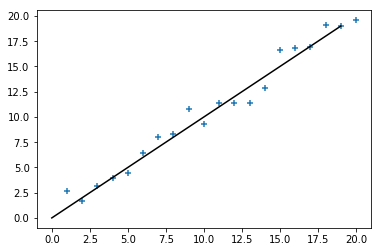

In [330]:
plt.scatter(x,y,marker = "+")
plt.plot(np.arange(20),'k-')


In [331]:
print(x,y)
print(x.shape,y.shape)
X = np.vstack((x,y)).T
print(X.shape)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [  2.68749742   1.66892843   3.11555473   3.92099597   4.43110663
   6.47263725   8.02780776   8.30186035  10.75315775   9.31389965
  11.36775741  11.33519207  11.40243523  12.87639244  16.60031624
  16.79420741  16.91164569  19.10235803  19.05173114  19.56340201]
(20,) (20,)
(20, 2)


In [332]:
X_std = (X - X.mean(axis = 0))/X.std(axis = 0)
print(X_std)

[[-1.64750894 -1.39561926]
 [-1.47408695 -1.5733678 ]
 [-1.30066495 -1.32091979]
 [-1.12724296 -1.18036377]
 [-0.95382097 -1.09134533]
 [-0.78039897 -0.73508169]
 [-0.60697698 -0.46369184]
 [-0.43355498 -0.41586744]
 [-0.26013299  0.01190382]
 [-0.086711   -0.23925838]
 [ 0.086711    0.11915644]
 [ 0.26013299  0.11347353]
 [ 0.43355498  0.125208  ]
 [ 0.60697698  0.38242548]
 [ 0.78039897  1.03228036]
 [ 0.95382097  1.06611594]
 [ 1.12724296  1.08660987]
 [ 1.30066495  1.46890692]
 [ 1.47408695  1.46007212]
 [ 1.64750894  1.54936283]]


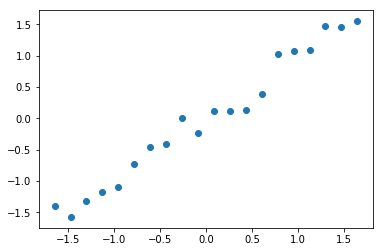

In [333]:
plt.scatter(X_std[:,0],X_std[:,1])

In [334]:
cov_np = np.cov(X_std.T)
print(cov_np) #using numpy

#or
mean_vector = X_std.mean(axis = 0) #here zero bcoz we already strandalize our data
cov_X = np.dot((X_std-mean_vector).T ,X_std-mean_vector)/(X_std.shape[0]-1)

assert(cov_np.all() == cov_X.all()) #checking whether our output is same or not


[[ 1.05263158  1.03948619]
 [ 1.03948619  1.05263158]]


In [335]:
#eigenvector and eigenvalue

eign_vals , eign_vect = np.linalg.eig(cov_X)
print("eigen_Vals:",eign_vals,"eigen_vect:",eign_vect,sep="\n")



eigen_Vals:
[ 0.01314539  2.09211777]
eigen_vect:
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [116]:
#sort eign_vectors based on eign_values
eig_pairs = list(zip(eign_vals,eign_vect))
eig_pairs.sort(key=lambda x : x[0],reverse = True)

In [336]:
# we will take only 1-d for our transformation
dim_reduce = eign_vect[:,:]
print(dim_reduce.shape)
print(X.shape)
data_transformed = X.dot(dim_reduce)
print(data_transformed)

(2, 2)
(20, 2)
[[  1.19324087  -2.60745443]
 [ -0.23410295  -2.59432418]
 [  0.08170953  -4.32435022]
 [ -0.05586429  -5.60098996]
 [ -0.40226836  -6.66879945]
 [  0.334205    -8.81948638]
 [  0.72676984 -10.62626477]
 [  0.2134475  -11.527156  ]
 [  1.23966973 -13.96759179]
 [ -0.48514621 -13.65698941]
 [  0.26004376 -15.81639294]
 [ -0.4700902  -16.50047255]
 [ -1.12964888 -17.25512743]
 [ -0.79451053 -19.00447934]
 [  1.13159447 -22.3447979 ]
 [  0.56158945 -23.18900644]
 [ -0.06247593 -23.97915463]
 [  0.77948484 -26.23532896]
 [  0.03657944 -26.90663712]
 [ -0.3087214  -27.97554985]]


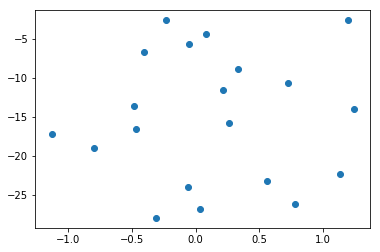

In [338]:
plt.scatter(data_transformed[:,0],data_transformed[:,1])

(2,)
(20,)


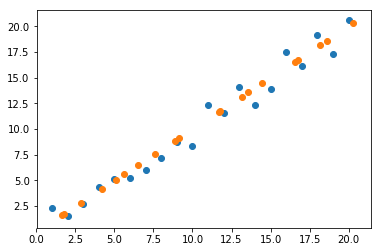

In [120]:
plt.scatter(x,y)
print(dim_reduce.shape)
print(data_transformed.shape)
reappear = data_transformed.reshape(20,1).dot(dim_reduce.reshape(2,1).T) 
plt.scatter(reappear[:,0],reappear[:,1])

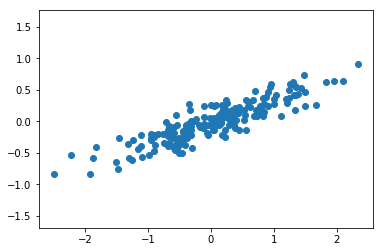

In [132]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');


In [133]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [134]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [135]:
print(pca.explained_variance_)
print(pca.mean_)

[ 0.7625315  0.0184779]
[ 0.03351168 -0.00408072]


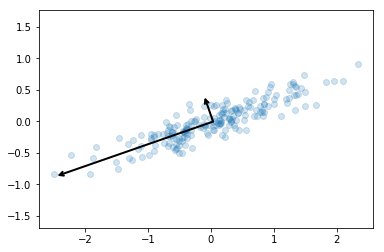

In [136]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

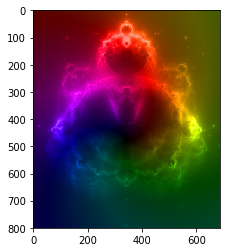

(800, 688, 3)
(800, 2064)
(800, 277)
0.999899702378


In [223]:
# from sklearn.decomposition import RandomizedPCA
import matplotlib.image as mpimg
image = mpimg.imread('big.jpg')
plt.imshow(image)
plt.show()

print(image.shape)
im = image.reshape((image.shape[0],-1))
print(im.shape)

pca = PCA(277,svd_solver="randomized").fit(im)
img_c = pca.transform(im)
print(img_c.shape)
print(np.sum(pca.explained_variance_ratio_))


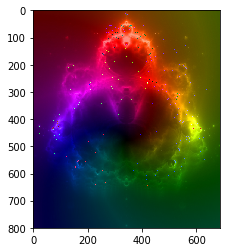

In [224]:
re = pca.inverse_transform(img_c)

temp = np.reshape(re,(800,688,3))
plt.imshow(temp.astype("uint8"))
plt.show()

In [218]:
s = 0
count=0
for i in pca.explained_variance_ratio_:
    s += i
    count += 1
    if(s>0.9999):
       break
print(count)
print(s)

277
0.999900617092


In [205]:
print(pca.explained_variance_ratio_)

[  6.05832399e-01   2.21392030e-01   6.88587044e-02   3.51888364e-02
   1.71322136e-02   1.42463328e-02   9.33541260e-03   4.79788267e-03
   3.66809755e-03   2.56737158e-03   2.37554751e-03   1.52322787e-03
   1.23253895e-03   1.12847148e-03   8.24276574e-04   8.14731635e-04
   7.23271986e-04   6.96460046e-04   5.92264884e-04   5.05159445e-04
   4.87267123e-04   3.92714551e-04   3.39884906e-04   3.09782233e-04
   3.02276219e-04   2.69791119e-04   2.39122722e-04   2.30881816e-04
   2.02496262e-04   1.70893467e-04   1.66657685e-04   1.59959841e-04
   1.48441885e-04   1.34885273e-04   1.26624909e-04   1.17250609e-04
   1.04572182e-04   9.96784773e-05   9.72616411e-05   9.04524380e-05
   8.70905182e-05   7.95762951e-05   7.53232525e-05   6.93957295e-05
   6.21862816e-05   6.09713907e-05   5.83122215e-05   5.72578516e-05
   5.35311326e-05   5.16563881e-05   5.00298272e-05   4.85951860e-05
   4.54161057e-05   4.29815312e-05   4.14363268e-05   3.92109172e-05
   3.62088132e-05   3.53497756e-05

(183, 275, 3)
(183, 144)
(144, 825)
(825,)
(183, 275, 3)


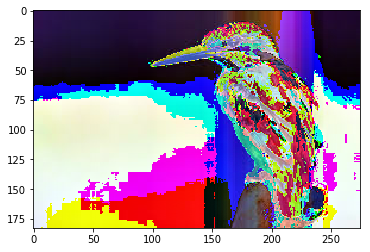

In [266]:
image = mpimg.imread("download.jpeg")
print(image.shape)
image = image.reshape((image.shape[0],-1))
pca = PCA(144).fit(image)
im_c = pca.transform(image)
# print(pca.explained_variance_.shape)
# im_c = (im_c)/np.sqrt(pca.explained_variance_)
print(im_c.shape)
print(pca.components_.shape)
print(pca.mean_.shape)
re = im_c.dot(pca.components_)
# re = 
re = re.reshape((image.shape[0],-1,3))

print(re.shape)
plt.imshow(re.astype("uint8"))

In [349]:
mu = np.array([0.0, 0.0])

# The desired covariance matrix.
r = np.array([
        [  4.40, -3.75],
        [ -3.75,  5.50]
    ])

# Generate the random samples.
data = np.random.multivariate_normal(mu, r, size=10000)


[-0.00925687  0.01319854]


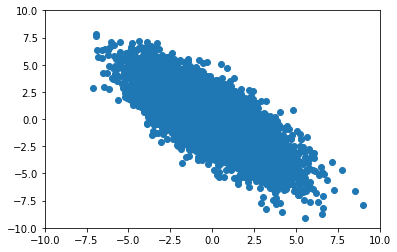

In [351]:
print(data.mean(axis=0))
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.scatter(data[:,0],data[:,1])


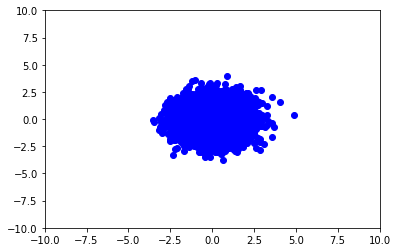

In [356]:
pca = PCA(2,whiten=True).fit(data)
trans = pca.transform(data)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.scatter(trans[:,0],trans[:,1],c="b")
